**About the dataset:**

In this dataset, there are transactions recorded over a period of two days, consisting of 492 instances of fraud out of a total of 284,807 transactions. The dataset exhibits a significant class imbalance, with the positive class (frauds) comprising only 0.172% of all transactions.

**Target variable:**

**'Class'**: This is a binary variable where 0 represents "Not fraud" and 1 represents "Fraud".

**Feature variables:**

**Time'**: The seconds elapsed between each transaction and the first transaction in the dataset.

**'Amount'**: The transaction amount.

**'V1', 'V2', ..., 'V28'**: The principal components resulting from the PCA transformation. Due to confidentiality reasons, the original features and additional background information about the data cannot be provided.

In [1]:
#load the data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
import matplotlib.pyplot as plt #(For Visualizations)
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Class', ylabel='count'>

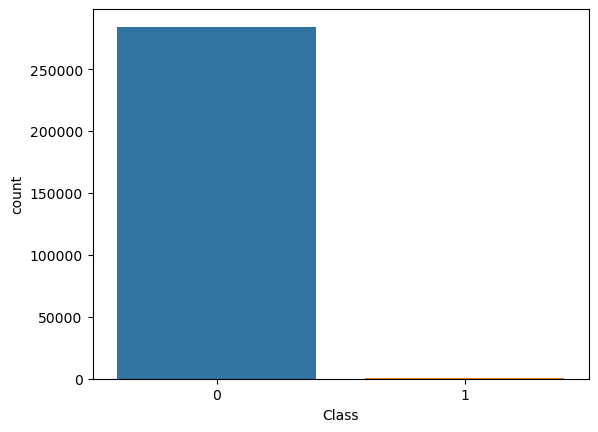

In [9]:
sns.countplot(x='Class',data=df)

In [10]:
# Dropping the target variable from train data and storing the rest of the attributes in "X" and target attribute in "y":
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [11]:
print(X.shape, y.shape)

(284807, 30) (284807,)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

In [13]:
# Splitting the data to train and test with test size of 30% from train data 
# random state is used so that train and test data are maintained; 
#stratify is used as the data given is a class imbalance problem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123,stratify=y)

In [14]:
#checking shape of train and test data:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [15]:
# Importing the required classifiers for model building:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 

**imbalance dataset using over sampling method SMOTE**

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [17]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [18]:
X_train_sm.shape

(398040, 30)

In [19]:
print(pd.value_counts(y_train_sm, normalize=True) * 100)

0    50.0
1    50.0
Name: Class, dtype: float64


In [20]:
scores = pd.DataFrame(columns=['Model', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                train_recall, train_precision, train_f1score,
                                                test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [21]:
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

# LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_model = LogisticRegression(solver='liblinear',random_state=1230)

In [24]:
Model=logistic_model.fit(X_train_sm,y_train_sm)

In [25]:
y_train_Pred_log = logistic_model.predict(X_train_sm)
y_test_Pred_log = logistic_model.predict(X_test)

In [26]:
y_pred = logistic_model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmr = confusion_matrix(y_test, y_pred)
print(cmr)

[[84090  1205]
 [   24   124]]


In [28]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[84090  1205]
 [   24   124]]

True Positives(TP) =  84090

True Negatives(TN) =  124

False Positives(FP) =  1205

False Negatives(FN) =  24


In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9118551988884364

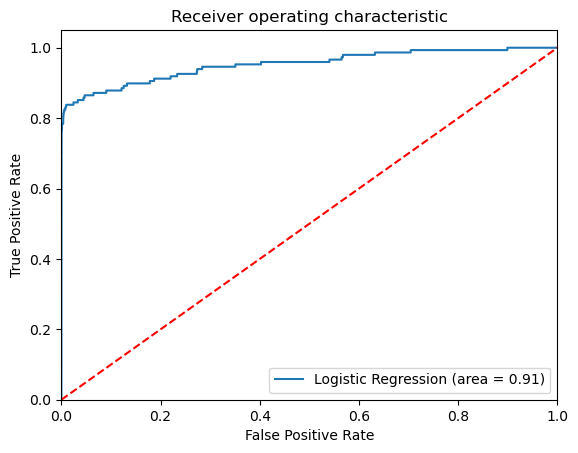

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logistic_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [31]:
classifcation_report_train_test(y_train_sm, y_train_Pred_log, y_test, y_test_Pred_log)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9559    0.9859    0.9707    199020
           1     0.9854    0.9545    0.9697    199020

    accuracy                         0.9702    398040
   macro avg     0.9707    0.9702    0.9702    398040
weighted avg     0.9707    0.9702    0.9702    398040


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9997    0.9859    0.9927     85295
           1     0.0933    0.8378    0.1679       148

    accuracy                         0.9856     85443
   macro avg     0.5465    0.9119    0.5803     85443
weighted avg     0.9981    0.9856    0.9913     85443



In [32]:
scores=get_metrics(y_train_sm,y_train_Pred_log,y_test,y_test_Pred_log,"Logistic",scores)
scores

/tmp/ipykernel_24/3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.970196,0.97066,0.970189,0.985616,0.998145,0.991317


# Random classifier using smote

In [33]:
rfclf2 = RandomForestClassifier(class_weight='balanced')

In [34]:
rfclf2 = rfclf2.fit(X_train_sm, y_train_sm)

In [35]:
train_pred=rfclf2.predict(X_train_sm)
test_pred=rfclf2.predict(X_test)

In [36]:
classifcation_report_train_test(y_train_sm, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    199020
           1     1.0000    1.0000    1.0000    199020

    accuracy                         1.0000    398040
   macro avg     1.0000    1.0000    1.0000    398040
weighted avg     1.0000    1.0000    1.0000    398040


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8828    0.7635    0.8188       148

    accuracy                         0.9994     85443
   macro avg     0.9412    0.8817    0.9093     85443
weighted avg     0.9994    0.9994    0.9994     85443



In [37]:
scores=get_metrics(y_train_sm,train_pred,y_test,test_pred,"Random forest_smote",scores)
scores

/tmp/ipykernel_24/3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.970196,0.97066,0.970189,0.985616,0.998145,0.991317
1,Random forest_smote,1.000000,1.00000,1.000000,0.999415,0.999387,0.999394


# XGBClassifier

In [38]:
from xgboost import XGBClassifier

In [39]:
xgb = XGBClassifier()

In [40]:
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:
y_pred_train_xsmote = xgb.predict(X_train_sm)
y_pred_test_xsmote = xgb.predict(X_test)

In [42]:
classifcation_report_train_test(y_train_sm, y_pred_train_xsmote, y_test, y_pred_test_xsmote)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    199020
           1     1.0000    1.0000    1.0000    199020

    accuracy                         1.0000    398040
   macro avg     1.0000    1.0000    1.0000    398040
weighted avg     1.0000    1.0000    1.0000    398040


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8636    0.7703    0.8143       148

    accuracy                         0.9994     85443
   macro avg     0.9316    0.8850    0.9070     85443
weighted avg     0.9994    0.9994    0.9994     85443



In [43]:
scores = get_metrics(y_train_sm, y_pred_train_xsmote, y_test, y_pred_test_xsmote, "Xgboost_smote", scores)
scores

/tmp/ipykernel_24/3559094045.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe       = dataframe.append(pd.Series([model_description,


,Model,Train_Recall,Train_Precision,Train_F1_Score,Test_Recall,Test_Precision,Test_F1_Score
0,Logistic,0.970196,0.97066,0.970189,0.985616,0.998145,0.991317
1,Random forest_smote,1.000000,1.00000,1.000000,0.999415,0.999387,0.999394
2,Xgboost_smote,1.000000,1.00000,1.000000,0.999391,0.999366,0.999374


# Test_data

In [44]:
final_pred = rfclf2.predict(X_test)

In [45]:
final_pred=pd.DataFrame(final_pred)

In [46]:
final_pred.rename(columns={0:'class'},inplace=True)

In [47]:
final_pred.head(3)

,class
0,0
1,0
2,0
